In [80]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('white')

In [81]:
trainDataSet = pd.read_csv('data/input/train.csv')

In [82]:
trainDataSet.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [83]:
trainDataSet.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [84]:
trainDataSet.shape

(10506, 12)

In [85]:
sprayDataset = pd.read_csv('data/spray.csv')
sprayDataset.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [86]:
weatherDataSet = pd.read_csv('data/input/weather.csv')
weatherDataSet.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6


In [87]:
TrainWeatherDataSet = pd.merge(trainDataSet, weatherDataSet, on ='Date')
TrainWeatherDataSet.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [88]:
fullDataset = pd.merge(TrainWeatherDataSet, sprayDataset, on =['Date', 'Longitude', 'Latitude'], how='left')

In [89]:
len(fullDataset.columns)

34

In [90]:
TrainWeatherDataSet.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [91]:
sprayDataset.columns

Index(['Date', 'Time', 'Latitude', 'Longitude'], dtype='object')

In [92]:
fullDataset.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Time
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5,NaN
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,M,M,M,0.00,29.44,30.09,5.8,16,7.4,NaN


In [93]:
fullDataset.fillna(0, inplace=True)

fullDataset.replace(to_replace='  T', value=0.02, inplace=True)

fullDataset.replace(to_replace='M', value=0, inplace=True)

fullDataset.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Time
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,0,0,0.0,0.00,29.39,30.11,5.8,18,6.5,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,0,0,0,0.00,29.44,30.09,5.8,16,7.4,0


In [94]:
fullDataset['PrecipTotal'].unique()

array(['0.00', '0.42', '0.27', '0.16', 0.02, 0, '1.55', '0.92', '0.01',
       '0.17', '0.04', '1.31', '0.06', '0.09', '0.05', '0.46', '0.23',
       '0.83', '0.37', '0.88', '0.24', '0.20', '0.18', '0.08', '0.12',
       '3.97', '0.87', '0.14', '0.19', '0.02', '0.03', '0.33', '0.95',
       '1.19', '0.89', '0.59', '0.52', '0.44', '0.39', '0.13', '0.70',
       '0.36', '0.79', '0.11', '0.50', '0.84', '0.58'], dtype=object)

In [95]:
# defining the features
features = ['Latitude', 'Longitude','PrecipTotal', 'Tmax', 'Tmin']

X = fullDataset[features]
y = fullDataset['WnvPresent']

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head()

lr = LogisticRegressionCV()

lr.fit(X_train, y_train)
trainScore = lr.score(X_train, y_train)
print('train score: ', trainScore )
testScore = lr.score(X_test, y_test)
print('test score: ', testScore )

train score:  0.9454280093914589
test score:  0.953931086997906


In [96]:
testDataSet = pd.read_csv('data/input/test.csv')
testDataSet.drop('Id', axis=1)
testDataSet.count()

Id                        116293
Date                      116293
Address                   116293
Species                   116293
Block                     116293
Street                    116293
Trap                      116293
AddressNumberAndStreet    116293
Latitude                  116293
Longitude                 116293
AddressAccuracy           116293
dtype: int64

In [97]:
116293*2

232586

In [98]:
testDataSet.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')

In [99]:
set(testDataSet['Date']) ^ set(weatherDataSet['Date'])

{'2007-08-12',
 '2010-10-26',
 '2014-10-15',
 '2013-07-25',
 '2012-08-25',
 '2011-10-09',
 '2011-05-13',
 '2014-05-05',
 '2014-09-06',
 '2008-08-28',
 '2010-05-12',
 '2014-07-29',
 '2014-10-16',
 '2014-08-29',
 '2011-06-12',
 '2007-06-02',
 '2007-10-27',
 '2008-06-10',
 '2010-05-30',
 '2014-10-30',
 '2007-07-11',
 '2008-10-07',
 '2013-06-05',
 '2012-05-21',
 '2007-05-23',
 '2013-05-27',
 '2011-07-28',
 '2008-08-16',
 '2011-06-26',
 '2008-06-19',
 '2011-05-02',
 '2009-09-20',
 '2011-05-21',
 '2009-07-19',
 '2008-10-31',
 '2009-07-03',
 '2007-07-23',
 '2014-07-07',
 '2008-05-10',
 '2008-07-22',
 '2012-05-17',
 '2012-08-26',
 '2012-10-16',
 '2011-08-17',
 '2013-09-06',
 '2014-09-26',
 '2009-05-03',
 '2009-10-31',
 '2012-07-29',
 '2009-06-04',
 '2009-05-28',
 '2008-06-15',
 '2008-06-02',
 '2008-05-17',
 '2009-07-30',
 '2011-09-09',
 '2012-08-19',
 '2013-09-08',
 '2008-09-24',
 '2012-07-08',
 '2013-10-20',
 '2013-06-24',
 '2014-05-12',
 '2010-06-05',
 '2014-07-02',
 '2007-10-02',
 '2009-10-

In [100]:
weatherDataSet.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [101]:
weatherDataSet['Date'][:5]

0    2007-05-01
1    2007-05-01
2    2007-05-02
3    2007-05-02
4    2007-05-03
Name: Date, dtype: object

In [102]:
weatherDataSet[weatherDataSet['Station'] == 1]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
10,1,2007-05-06,68,49,59,4,30,46,6,0,...,,0,M,0.0,0.00,29.57,30.29,14.4,11,15.0
12,1,2007-05-07,83,47,65,10,41,54,0,0,...,RA,0,M,0.0,T,29.38,30.12,8.6,18,10.5
14,1,2007-05-08,82,54,68,12,58,62,0,3,...,BR,0,M,0.0,0.00,29.29,30.03,2.7,11,5.8
16,1,2007-05-09,77,61,69,13,59,63,0,4,...,BR HZ,0,M,0.0,0.13,29.21,29.94,3.9,9,6.2
18,1,2007-05-10,84,56,70,14,52,60,0,5,...,BR,0,M,0.0,0.00,29.20,29.92,0.7,17,4.1


In [103]:
testDataset_station1 = pd.merge(testDataSet, weatherDataSet[weatherDataSet['Station'] == 1], on ='Date', how='left')
testDataset_station2 = pd.merge(testDataSet, weatherDataSet[weatherDataSet['Station'] == 2], on ='Date', how='left')

In [104]:
testDataset_station1.shape

(116293, 32)

In [105]:
# testDataSet = pd.merge(testWeatherDataSet,sprayDataset, on =['Date', 'Longitude', 'Latitude'], how='left')
# testDataSet.head(2)

In [106]:
testDataset_station1.fillna(0, inplace=True)
testDataset_station1.replace(to_replace='  T', value=0.02, inplace=True)
testDataset_station1.replace(to_replace='M', value=0, inplace=True)

# Test data sets for station 1 and 2

testDataset_station2.fillna(0, inplace=True)
testDataset_station2.replace(to_replace='  T', value=0.02, inplace=True)
testDataset_station2.replace(to_replace='M', value=0, inplace=True)

In [107]:
testDataset_station1.shape

(116293, 32)

In [108]:
trainDataSet.shape

(10506, 12)

In [109]:
testDataset_station1.shape

(116293, 32)

In [110]:
testDataSet.fillna(0, inplace=True)

In [111]:
testDataset_station1.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'Station', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'Water1',
       'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed',
       'ResultDir', 'AvgSpeed'],
      dtype='object')

In [112]:
testDataset_station1.drop('Id', axis=1)
testDataset_station2.drop('Id', axis=1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,,0,0,0,0.00,29.34,29.97,9.4,18,10.4
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,,0,0,0,0.00,29.34,29.97,9.4,18,10.4
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,,0,0,0,0.00,29.34,29.97,9.4,18,10.4
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,,0,0,0,0.00,29.34,29.97,9.4,18,10.4
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,,0,0,0,0.00,29.34,29.97,9.4,18,10.4
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TARSALIS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,,0,0,0,0.00,29.34,29.97,9.4,18,10.4
6,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",UNSPECIFIED CULEX,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,,0,0,0,0.00,29.34,29.97,9.4,18,10.4
7,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX ERRATICUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,,0,0,0,0.00,29.34,29.97,9.4,18,10.4
8,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX PIPIENS/RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,,0,0,0,0.00,29.34,29.97,9.4,18,10.4
9,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,,0,0,0,0.00,29.34,29.97,9.4,18,10.4


In [113]:
# defining the features
features = ['Latitude', 'Longitude','PrecipTotal', 'Tmax', 'Tmin']

X_station_1 = testDataset_station1[features]
X_station_2 = testDataset_station1[features]
# y = testDataSet['WnvPresent']

#trainScore = lr.score(X_train, y_train)
#print('train score: ', trainScore )

preds_1 = lr.predict(X_station_1)
preds_2 = lr.predict(X_station_2)
preds_1, preds_2
# lr.predict_proba(X)
# testScore = lr.score(X_test, y_test)
# print('test score: ', testScore )

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

## Using Principal component Analysis

In [114]:
pcaDataSet = fullDataset.drop(columns=['Station','WnvPresent', 'Date','Address','Species','Block','Street', 'Trap','AddressNumberAndStreet','Time', 'Sunrise', 'Sunset','CodeSum'])

In [115]:
pcaDataSet.head()

,Latitude,Longitude,AddressAccuracy,NumMosquitos,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,...,Cool,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,41.954690,-87.800991,9,1,88,60,74,10,58,65,...,9,0,0,0.0,0.00,29.39,30.11,5.8,18,6.5
1,41.954690,-87.800991,9,1,88,65,77,0,59,66,...,12,0,0,0,0.00,29.44,30.09,5.8,16,7.4
2,41.954690,-87.800991,9,1,88,60,74,10,58,65,...,9,0,0,0.0,0.00,29.39,30.11,5.8,18,6.5
3,41.954690,-87.800991,9,1,88,65,77,0,59,66,...,12,0,0,0,0.00,29.44,30.09,5.8,16,7.4
4,41.994991,-87.769279,9,1,88,60,74,10,58,65,...,9,0,0,0.0,0.00,29.39,30.11,5.8,18,6.5


In [116]:
pcaDataSet.SnowFall.unique()

array(['0.0', 0, 0.02], dtype=object)

In [117]:
fullDataset['Year'] = [each[0:4] for each in fullDataset['Date']]

In [118]:
fullDataset['Month'] = [each[0:4] for each in fullDataset['Date']]

In [119]:
# pcaDataSet.dtypes

In [120]:
pcaDataSet.astype(dtype='float').head()

,Latitude,Longitude,AddressAccuracy,NumMosquitos,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,...,Cool,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,41.954690,-87.800991,9.0,1.0,88.0,60.0,74.0,10.0,58.0,65.0,...,9.0,0.0,0.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5
1,41.954690,-87.800991,9.0,1.0,88.0,65.0,77.0,0.0,59.0,66.0,...,12.0,0.0,0.0,0.0,0.0,29.44,30.09,5.8,16.0,7.4
2,41.954690,-87.800991,9.0,1.0,88.0,60.0,74.0,10.0,58.0,65.0,...,9.0,0.0,0.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5
3,41.954690,-87.800991,9.0,1.0,88.0,65.0,77.0,0.0,59.0,66.0,...,12.0,0.0,0.0,0.0,0.0,29.44,30.09,5.8,16.0,7.4
4,41.994991,-87.769279,9.0,1.0,88.0,60.0,74.0,10.0,58.0,65.0,...,9.0,0.0,0.0,0.0,0.0,29.39,30.11,5.8,18.0,6.5


In [121]:
# pcaDataSet.info()

In [122]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(pcaDataSet)
# print(pca.components_)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [123]:
var_exp = pca.explained_variance_ratio_
print('Explained variance: ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:  [4.57552641e-01 3.07629167e-01 1.15493061e-01 3.67419537e-02
 2.49284569e-02 2.12855042e-02 1.57374983e-02 8.90078440e-03
 7.95615975e-03 2.66210739e-03 8.12996118e-04 1.40584877e-04
 6.61963312e-05 5.99439770e-05 1.93262224e-05 9.51817881e-06
 4.09730948e-06 4.30409539e-09 1.32903734e-32 4.65723294e-37
 1.03459288e-39]
Cumulative explained variance:  [0.45755264 0.76518181 0.88067487 0.91741682 0.94234528 0.96363078
 0.97936828 0.98826907 0.99622523 0.99888733 0.99970033 0.99984091
 0.99990711 0.99996705 0.99998638 0.9999959  1.         1.
 1.         1.         1.        ]


In [124]:
cum_var_exp.shape

(21,)

In [125]:
len(var_exp)

21

In [126]:
# len(component_number)

In [127]:
baseline = 1 - y_train.mean()

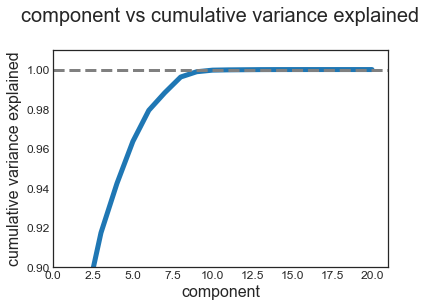

In [128]:
## plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the cumulative explained variance
#component_number = [1,2,3]
component_number = range(21)
plt.plot(component_number, cum_var_exp, lw=5)
# plt.plot(var_exp, cum_var_exp, lw=7)

# # --------------------------------------------------

# # NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
# plt.axhline(y=baseline, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=3, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([0,21])
ax.set_ylim([.9,1.01])

# # Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# # Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# # Add title
ax.set_title('component vs cumulative variance explained\n', fontsize=20)
plt.show()

In [129]:
cum_var_exp

array([0.45755264, 0.76518181, 0.88067487, 0.91741682, 0.94234528,
       0.96363078, 0.97936828, 0.98826907, 0.99622523, 0.99888733,
       0.99970033, 0.99984091, 0.99990711, 0.99996705, 0.99998638,
       0.9999959 , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [130]:
pca.components_[:3]

array([[ 9.59755099e-04, -5.00054343e-04,  1.56214116e-02,
        -5.53201787e-01, -3.60991302e-01, -3.44039617e-01,
        -3.53298432e-01, -1.22798389e-01, -3.42174417e-01,
        -3.28970351e-01,  9.26056709e-02, -2.60692761e-01,
        -0.00000000e+00, -7.52316385e-37, -3.06293255e-06,
        -2.70128701e-03, -4.71646933e-03,  2.29732689e-03,
         1.41613808e-03, -5.63910950e-02, -9.34064889e-03],
       [-8.41386288e-04, -1.81605528e-04, -1.56526619e-02,
         8.30483105e-01, -2.44995925e-01, -2.12488080e-01,
        -2.29007677e-01, -9.34325052e-02, -2.30672018e-01,
        -2.16789499e-01,  6.16785351e-02, -1.67329142e-01,
        -0.00000000e+00, -1.92592994e-34, -5.95075771e-06,
        -3.60204794e-03, -2.46181048e-03,  1.87183310e-03,
         2.89878133e-04, -1.07884582e-01, -5.61000797e-03],
       [ 7.02848621e-05, -1.56273901e-04,  8.52474144e-04,
         5.87332317e-02, -1.41633401e-02, -7.36799503e-02,
        -4.48851565e-02, -1.20730600e-02, -7.75914321e

In [131]:
trainDataSet.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [132]:
testDataset_station1.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'Station', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'Water1',
       'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed',
       'ResultDir', 'AvgSpeed'],
      dtype='object')

In [133]:
trainDataSet.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [141]:

# defining the features
features = ['Latitude', 'Longitude', 'AddressAccuracy','Tmax', 'Tmin']

X = fullDataset[features]
y = fullDataset['WnvPresent']

X_train, X_test, y_train, y_test = train_test_split(X, y)
# X_train.head()

lr = LogisticRegressionCV()

lr.fit(X_train, y_train)
trainScore = lr.score(X_train, y_train)
print('train score: ', trainScore )

train score:  0.9472047718763881


In [135]:
fullDataset.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Time', 'Year',
       'Month'],
      dtype='object')

In [136]:
testDataset_station1.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'Station', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'Water1',
       'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed',
       'ResultDir', 'AvgSpeed'],
      dtype='object')

In [137]:
# defining the features
features = ['Latitude', 'Longitude', 'AddressAccuracy','Tmax', 'Tmin']

X_station_1 = testDataset_station1[features]
X_station_1 = testDataset_station1[features]
# y = testDataSet['WnvPresent']

X_station_1.shape
#trainScore = lr.score(X_train, y_train)
#print('train score: ', trainScore )

lr.predict(X_station_1)
lr.predict(X_station_2)
# lr.predict_proba(X)
# testScore = lr.score(X_test, y_test)
# print('test score: ', testScore )

array([0, 0, 0, ..., 0, 0, 0])

In [138]:
y_test.shape

(5253,)

In [139]:
lr.predict_proba(X_station_1), lr.predict_proba(X_station_2)

(array([[0.95369888, 0.04630112],
        [0.95369888, 0.04630112],
        [0.95369888, 0.04630112],
        ...,
        [0.95124356, 0.04875644],
        [0.95124356, 0.04875644],
        [0.95124356, 0.04875644]]), array([[0.95687203, 0.04312797],
        [0.95687203, 0.04312797],
        [0.95687203, 0.04312797],
        ...,
        [0.954102  , 0.045898  ],
        [0.954102  , 0.045898  ],
        [0.954102  , 0.045898  ]]))

In [140]:
# testScore1 = lr.score(X_station_1, y_test)
# testScore2 = lr.score(X_station_2, y_test)
# print('test score: ', testScore )

ValueError: Found input variables with inconsistent numbers of samples: [5253, 116293]

In [68]:
len(testDataset_station1)

116293

In [69]:
len(preds)

21012

In [70]:
# convert to csv
predsDF = pd.DataFrame()
predsDF['Id'] = [each for each in range(232586)]
predsDF['WnvPresent'] = preds

predsDF.to_csv('predictions.csv', index=False)

ValueError: Length of values does not match length of index

## Plotting graphs 

In [54]:
winterVirus = fullDataset[['Date', 'WnvPresent']].copy()

In [55]:
# winterVirus['Date'].unique()

In [56]:
winterVirus['Year'] = [each[0:4] for each in winterVirus['Date']]

In [57]:
winterVirus['Month'] = [each[5:7] for each in winterVirus['Date']]
winterVirus.head()

,Date,WnvPresent,Year,Month
0,2007-05-29,0,2007,05
1,2007-05-29,0,2007,05
2,2007-05-29,0,2007,05
3,2007-05-29,0,2007,05
4,2007-05-29,0,2007,05


In [58]:
# g1 = df1.groupby( [ "Name", "City"] ).count()
winterVirusDF = winterVirus.groupby(['Year', 'Month']).count()

In [59]:
winterVirusDF

Date  WnvPresent
Year Month                  
2007 05       50          50
     06      352         352
     07     1150        1150
     08     4100        4100
     09     1548        1548
     10      422         422
2009 05      118         118
     06     1156        1156
     07     1510        1510
     08      748         748
     09      836         836
     10      130         130
2011 06      762         762
     07     1280        1280
     08      986         986
     09     1080        1080
2013 06      872         872
     07     1272        1272
     08     1668        1668
     09      972         972

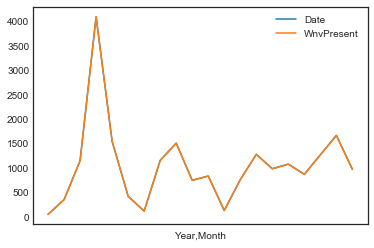

In [60]:
winterVirusDF.plot()

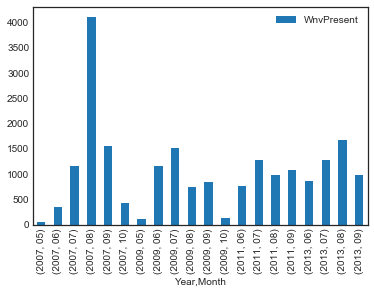

In [61]:
winterVirusDF.drop('Date',axis=1).plot(kind='bar')

In [62]:
# #set(winterVirus2007, 'Position', [100, 100, 100, 100])

# plt.figure(figsize=(28,14))
# plt1 = plt.bar(winterVirus2007['YearMonth'], winterVirus2007['WnvPresent'])
# pl2 = plt.Line2D(winterVirus2009['YearMonth'], winterVirus2009['WnvPresent'])
# # set(plt1, 'FaceColor','r')
# # set(plt2, 'FaceColor','b')